# Load Audio Files

In [2]:
import os

scream_dir = r"D:\Ashraf\NCI\Semester 2\Research In Computing\Dataset\Screaming"
non_scream_dir = r"D:\Ashraf\NCI\Semester 2\Research In Computing\Dataset\NotScreaming"

file_paths = []
labels = []

# Load scream files with label 'yes'
for file_name in os.listdir(scream_dir):
    file_paths.append(os.path.join(scream_dir, file_name))
    labels.append("yes")

# Load non-scream files with label 'no'
for file_name in os.listdir(non_scream_dir):
    file_paths.append(os.path.join(non_scream_dir, file_name))
    labels.append("no")

print(f"Loaded {len(file_paths)} audio files.")
print(f"Number of files: {len(file_paths)}")
print(f"Labels count: {len(labels)}")
print(f"Scream files labeled 'yes': {labels.count('yes')}")
print(f"Non-scream files labeled 'no': {labels.count('no')}")

Loaded 3493 audio files.
Number of files: 3493
Labels count: 3493
Scream files labeled 'yes': 862
Non-scream files labeled 'no': 2631


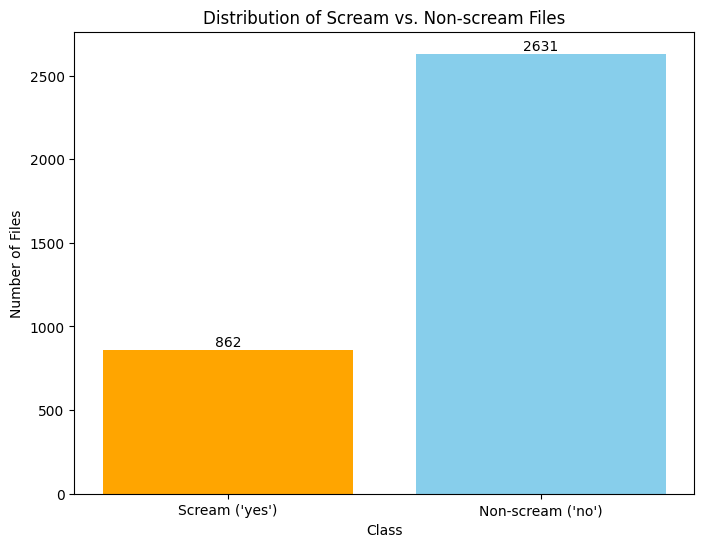

In [3]:
# Visualize label distribution

import matplotlib.pyplot as plt

label_counts = [labels.count("yes"), labels.count("no")]
label_names = ["Scream ('yes')", "Non-scream ('no')"]

plt.figure(figsize=(8, 6))
bars = plt.bar(label_names, label_counts, color=['orange', 'skyblue'])
plt.xlabel("Class")
plt.ylabel("Number of Files")
plt.title("Distribution of Scream vs. Non-scream Files")

plt.bar_label(bars, label_type='edge')

plt.show()

# Sampling

In [4]:
from sklearn.utils import resample
import numpy as np

yes_indices = [i for i, label in enumerate(labels) if label == 'yes']
no_indices = [i for i, label in enumerate(labels) if label == 'no']

# Upsample screams
yes_upsampled = resample(
    yes_indices,
    replace=True,
    n_samples=len(no_indices),
    random_state=42
)

# Combine indices and shuffle
balanced_indices = yes_upsampled + no_indices
np.random.shuffle(balanced_indices)

In [5]:
file_paths_balanced = [file_paths[i] for i in balanced_indices]
labels_balanced = [labels[i] for i in balanced_indices]

print(f"Balanced dataset size: {len(labels_balanced)}")
print(f"Number of 'yes': {labels_balanced.count('yes')}")
print(f"Number of 'no': {labels_balanced.count('no')}")

Balanced dataset size: 5262
Number of 'yes': 2631
Number of 'no': 2631


# Check Sample Rate of the audio files

In [6]:
import librosa
from collections import Counter

sample_rates = []

def get_sample_rate(file_path):
    return librosa.get_samplerate(file_path)

for file_path in file_paths_balanced:
    sample_rate = get_sample_rate(file_path)
    sample_rates.append(sample_rate)

sample_rate_counts = Counter(sample_rates)

print("Sample Rate Overview:")
for rate, count in sample_rate_counts.items():
    print(f"Sample Rate: {rate} Hz")
    print(f"Number of Files: {count}")

Sample Rate Overview:
Sample Rate: 44100 Hz
Number of Files: 5262


# Visualize Waveforms of raw audio files

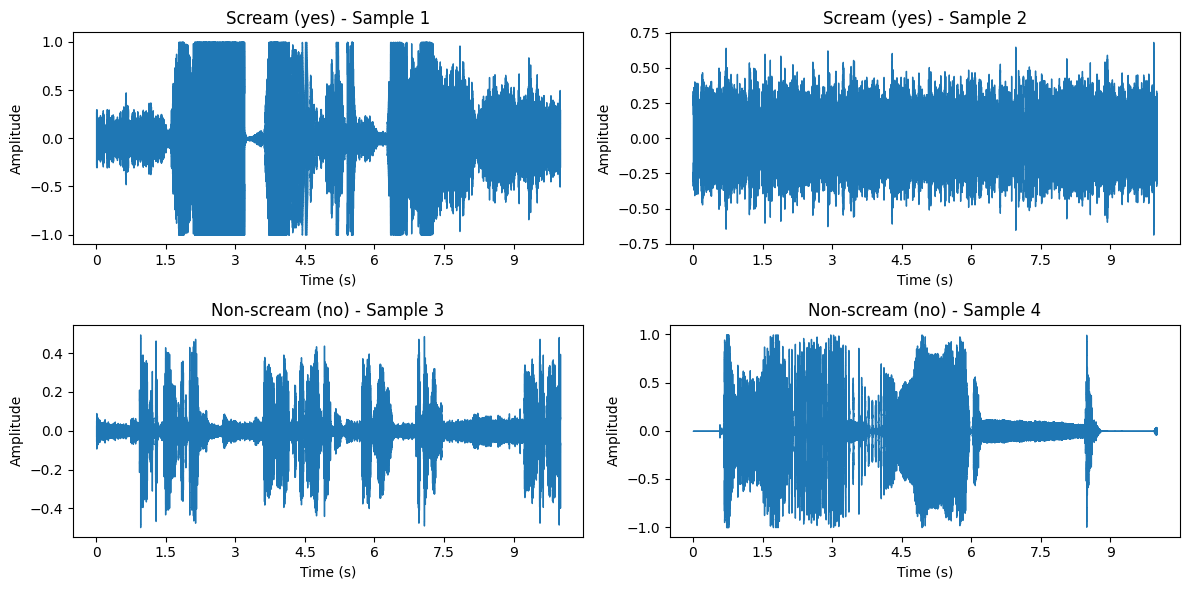

In [7]:
import random
import librosa.display
import matplotlib.pyplot as plt

def display_waveforms(file_paths_balanced, labels_balanced, num_samples=2):
    scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "yes"]
    non_scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "no"]

    scream_samples = random.sample(scream_files, num_samples)
    non_scream_samples = random.sample(non_scream_files, num_samples)

    plt.figure(figsize=(12, 6))
    for i, file_path in enumerate(scream_samples + non_scream_samples, 1):
        audio, sample_rate = librosa.load(file_path, sr=44100)
        plt.subplot(2, num_samples, i)
        librosa.display.waveshow(audio, sr=sample_rate)
        title = "Scream (yes)" if i <= num_samples else "Non-scream (no)"
        plt.title(f"{title} - Sample {i}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Display waveforms
display_waveforms(file_paths_balanced, labels_balanced, num_samples=2)

# Visualize Spectogram using Short-Time Fourier Transform (STFT)

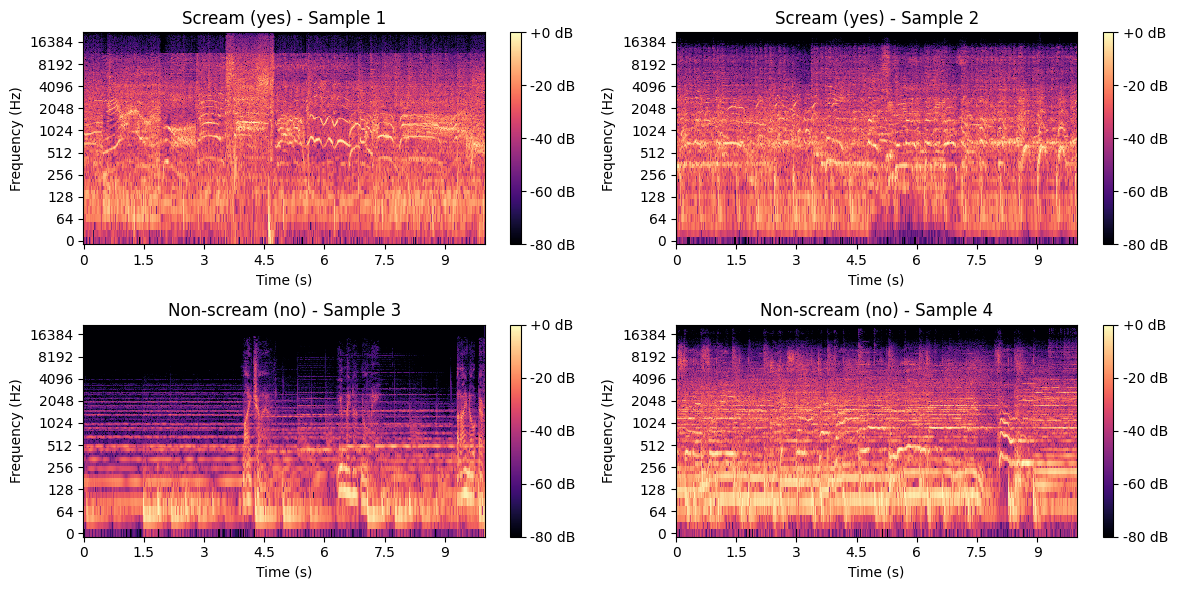

In [8]:
import librosa.display
import numpy as np

def display_stft_spectrograms(file_paths_balanced, labels_balanced, num_samples=2):
    scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "yes"]
    non_scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "no"]

    scream_samples = random.sample(scream_files, num_samples)
    non_scream_samples = random.sample(non_scream_files, num_samples)

    plt.figure(figsize=(12, 6))
    for i, file_path in enumerate(scream_samples + non_scream_samples, 1):
        audio, sample_rate = librosa.load(file_path, sr=44100)

        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

        plt.subplot(2, num_samples, i)
        librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='log')
        title = "Scream (yes)" if i <= num_samples else "Non-scream (no)"
        plt.title(f"{title} - Sample {i}")
        plt.colorbar(format='%+2.0f dB')
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")

    plt.tight_layout()
    plt.show()

display_stft_spectrograms(file_paths_balanced, labels_balanced, num_samples=2)

# Data Augmentation for Scream Data

In [9]:
# def time_shift(audio, shift_max=0.2):
#     shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
#     return np.roll(audio, shift)

# def pitch_shift(audio, sample_rate, n_steps):
#     return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

# def speed_change(audio, speed_factor):
#     return librosa.effects.time_stretch(audio, rate=speed_factor)

# def add_noise(audio, noise_factor=0.005):
#     noise = np.random.randn(len(audio))
#     return audio + noise_factor * noise

# def augment_scream_data(audio, sample_rate):
#     augmented_audios = [
#         time_shift(audio),
#         pitch_shift(audio, sample_rate, n_steps=np.random.randint(-2, 3)),
#         speed_change(audio, speed_factor=np.random.uniform(0.9, 1.1)),
#         add_noise(audio)
#     ]
#     return augmented_audios

# scream_augmented_data = []
# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     if label == "yes":
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         augmented_versions = augment_scream_data(audio, sample_rate)
#         scream_augmented_data.extend(augmented_versions)


In [10]:
# def time_shift(audio, shift_max=0.2):
#     shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
#     return np.roll(audio, shift)

# def pitch_shift(audio, sample_rate, n_steps):
#     return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

# def speed_change(audio, speed_factor):
#     return librosa.effects.time_stretch(audio, rate=speed_factor)

# def add_noise(audio, noise_factor=0.005):
#     noise = np.random.randn(len(audio))
#     return audio + noise_factor * noise

# def augment_audio(audio, sample_rate, augmentations=None):
#     if augmentations is None:
#         augmentations = ['time_shift', 'pitch_shift', 'speed_change', 'add_noise']
    
#     augmented_audios = []
#     if 'time_shift' in augmentations:
#         augmented_audios.append(time_shift(audio))
#     if 'pitch_shift' in augmentations:
#         n_steps = np.random.randint(-2, 3)
#         augmented_audios.append(pitch_shift(audio, sample_rate, n_steps))
#     if 'speed_change' in augmentations:
#         speed_factor = np.random.uniform(0.9, 1.1)
#         augmented_audios.append(speed_change(audio, speed_factor))
#     if 'add_noise' in augmentations:
#         augmented_audios.append(add_noise(audio))
    
#     return [np.clip(aug, -1.0, 1.0) for aug in augmented_audios]

# augmented_data, augmented_labels = [], []
# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     augmented_versions = augment_audio(audio, sample_rate)
#     augmented_data.extend(augmented_versions)
#     augmented_labels.extend([label] * len(augmented_versions))

Final

In [11]:
import os
import librosa
import numpy as np
import soundfile as sf

# Directory to save augmented audio files
augmented_dir = "augmented_data"
os.makedirs(augmented_dir, exist_ok=True)

def time_shift(audio, shift_max=0.2):
    shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
    return np.roll(audio, shift)

def pitch_shift(audio, sample_rate, n_steps):
    return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

def speed_change(audio, speed_factor):
    return librosa.effects.time_stretch(audio, rate=speed_factor)

def add_noise(audio, noise_factor=0.005):
    noise = np.random.randn(len(audio))
    return audio + noise_factor * noise

def augment_audio(audio, sample_rate, file_name, label, augmentations=None):
    """Augment audio, save results to disk, and return saved file paths and labels."""
    if augmentations is None:
        augmentations = ['time_shift', 'pitch_shift', 'speed_change', 'add_noise']

    augmented_file_paths = []
    augmented_labels = []

    # Apply augmentations
    if 'time_shift' in augmentations:
        augmented = time_shift(audio)
        save_path = os.path.join(augmented_dir, f"{file_name}_time_shift.wav")
        sf.write(save_path, augmented, sample_rate)
        augmented_file_paths.append(save_path)
        augmented_labels.append(label)

    if 'pitch_shift' in augmentations:
        n_steps = np.random.randint(-2, 3)
        augmented = pitch_shift(audio, sample_rate, n_steps)
        save_path = os.path.join(augmented_dir, f"{file_name}_pitch_shift.wav")
        sf.write(save_path, augmented, sample_rate)
        augmented_file_paths.append(save_path)
        augmented_labels.append(label)

    if 'speed_change' in augmentations:
        speed_factor = np.random.uniform(0.9, 1.1)
        augmented = speed_change(audio, speed_factor)
        save_path = os.path.join(augmented_dir, f"{file_name}_speed_change.wav")
        sf.write(save_path, augmented, sample_rate)
        augmented_file_paths.append(save_path)
        augmented_labels.append(label)

    if 'add_noise' in augmentations:
        augmented = add_noise(audio)
        save_path = os.path.join(augmented_dir, f"{file_name}_add_noise.wav")
        sf.write(save_path, augmented, sample_rate)
        augmented_file_paths.append(save_path)
        augmented_labels.append(label)

    return augmented_file_paths, augmented_labels

# Incrementally process files and save augmented data
file_paths_augmented = []
labels_augmented = []

for file_path, label in zip(file_paths_balanced, labels_balanced):
    audio, sample_rate = librosa.load(file_path, sr=44100)
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    augmented_file_paths, augmented_labels = augment_audio(audio, sample_rate, file_name, label)
    file_paths_augmented.extend(augmented_file_paths)
    labels_augmented.extend(augmented_labels)

print(f"Augmented audio files saved in: {augmented_dir}")

Augmented audio files saved in: augmented_data


# Extract MFCC from original and augmented data

In [12]:
# import numpy as np
# import pandas as pd

# def extract_mfcc(audio, sample_rate, n_mfcc=40):
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
#     return np.mean(mfccs.T, axis=0)

# features = []
# feature_labels = []

# for file_path, label in zip(file_paths, labels):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     mfccs = extract_mfcc(audio, sample_rate)
#     features.append(mfccs)
#     feature_labels.append(label)

# for file_path, label in zip(file_paths, labels):
#     if label == "yes":
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         augmented_versions = augment_scream_data(audio, sample_rate)
#         for augmented_audio in augmented_versions:
#             mfccs = extract_mfcc(augmented_audio, sample_rate)
#             features.append(mfccs)
#             feature_labels.append("yes")

# data_df = pd.DataFrame(features)
# data_df['label'] = feature_labels

# data_df.head()

In [13]:
# data_df.shape

In [14]:
# data_df.to_csv('MFCC_Extracted_Data.csv', index=False)

In [15]:
# # Visualize MFCCs

# def display_mfcc(file_paths, labels, num_samples=2, n_mfcc=40):
#     scream_files = [file for file, label in zip(file_paths, labels) if label == "yes"]
#     non_scream_files = [file for file, label in zip(file_paths, labels) if label == "no"]

#     scream_samples = random.sample(scream_files, num_samples)
#     non_scream_samples = random.sample(non_scream_files, num_samples)

#     plt.figure(figsize=(12, 8))
#     for i, file_path in enumerate(scream_samples + non_scream_samples, 1):
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

#         plt.subplot(2, num_samples, i)
#         librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
#         plt.colorbar(format='%+2.0f')
#         title = "Scream (yes)" if i <= num_samples else "Non-scream (no)"
#         plt.title(f"{title} - Sample {i}")
#         plt.xlabel("Time")
#         plt.ylabel("MFCC Coefficients")
        
#     plt.tight_layout()
#     plt.show()

# display_mfcc(file_paths, labels, num_samples=2, n_mfcc=40)

In [16]:
# import pandas as pd

# # Function to extract audio features: MFCC, chroma, spectral contrast, and zero-crossing rate
# def extract_audio_features(audio, sample_rate, n_mfcc=40):
#     # Extract MFCCs
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
#     mfccs_mean = np.mean(mfccs.T, axis=0)
    
#     # Extract Chroma features
#     chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
#     chroma_mean = np.mean(chroma.T, axis=0)
    
#     # Extract Spectral Contrast
#     spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
#     spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)
    
#     # Extract Zero-Crossing Rate
#     zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
#     zero_crossing_mean = np.mean(zero_crossing)
    
#     # Combine all features into a single vector
#     return np.concatenate([mfccs_mean, chroma_mean, spectral_contrast_mean, [zero_crossing_mean]])


# # Extract enhanced features from the dataset
# enhanced_features = []
# feature_labels = []

# # Original data
# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     features = extract_audio_features(audio, sample_rate)
#     enhanced_features.append(features)
#     feature_labels.append(label)

# # Augmented data (if augment_scream_data is used)
# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     if label == "yes":
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         augmented_versions = augment_scream_data(audio, sample_rate)
#         for augmented_audio in augmented_versions:
#             features = extract_audio_features(augmented_audio, sample_rate)
#             enhanced_features.append(features)
#             feature_labels.append("yes")

# # Create a DataFrame for the enhanced features
# enhanced_features_df = pd.DataFrame(enhanced_features)
# enhanced_features_df['label'] = feature_labels

# # Display the DataFrame
# enhanced_features_df.head()

Final

In [17]:
def extract_features(file_paths, labels):
    features, feature_labels = [], []
    for file_path, label in zip(file_paths, labels):
        audio, sample_rate = librosa.load(file_path, sr=44100)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
        zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
        feature = np.concatenate([np.mean(mfccs.T, axis=0), 
                                  np.mean(chroma.T, axis=0), 
                                  np.mean(spectral_contrast.T, axis=0), 
                                  [np.mean(zero_crossing)]])
        features.append(feature)
        feature_labels.append(label)
    return np.array(features), np.array(feature_labels)

features, feature_labels = extract_features(file_paths_augmented, labels_augmented)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


# Modelling

# Splitting the data

In [18]:
# from sklearn.model_selection import train_test_split

# # Split the data into features (X) and labels (y)
# X = enhanced_features_df.drop(columns=['label'])
# y = enhanced_features_df['label']

# # Perform a train-validation-test split
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# # Output the size of the splits
# print(f"Training Set Size: {len(X_train)}")
# print(f"Validation Set Size: {len(X_val)}")
# print(f"Test Set Size: {len(X_test)}")

In [19]:
# from sklearn.model_selection import train_test_split

# X = data_df.drop(columns=['label'])
# y = data_df['label'] 

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")


In [20]:
from sklearn.model_selection import train_test_split

X = np.array(features)
y = np.array(feature_labels)

X_train_val, X_test, y_train_val, y_test = train_test_split(features, feature_labels, test_size=0.15, stratify=feature_labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# SVM

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# SVM Model
print("Training SVM...")
svm_model = SVC(probability=True, kernel="linear", random_state=42)
svm_model.fit(X_train_scaled, y_train)

Training SVM...


SVC(kernel='linear', probability=True, random_state=42)

In [23]:
# Validation Accuracy for SVM
y_val_pred_svm = svm_model.predict(X_val_scaled)
svm_val_accuracy = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM Validation Accuracy: {svm_val_accuracy:.2f}")

SVM Validation Accuracy: 0.79


In [24]:
# Test Accuracy for SVM
y_test_pred_svm = svm_model.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Test Accuracy: {svm_test_accuracy:.2f}")

SVM Test Accuracy: 0.81


MLP - Updated

In [25]:
from sklearn.neural_network import MLPClassifier

print("Training MLP...")
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

Training MLP...


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [26]:
# Validation Accuracy for MLP
y_val_pred_mlp = mlp_model.predict(X_val_scaled)
mlp_val_accuracy = accuracy_score(y_val, y_val_pred_mlp)
print(f"MLP Validation Accuracy: {mlp_val_accuracy:.2f}")

MLP Validation Accuracy: 0.96


In [27]:
# Test Accuracy for MLP
y_test_pred_mlp = mlp_model.predict(X_test_scaled)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
print(f"MLP Test Accuracy: {mlp_test_accuracy:.2f}")

MLP Test Accuracy: 0.97


# RESNET-34 - Updated

In [28]:
image_dir = "spectrogram_images"
os.makedirs(image_dir, exist_ok=True)

def save_mfcc_images(file_paths, labels, image_dir):
    for file_path, label in zip(file_paths, labels):
        audio, sample_rate = librosa.load(file_path, sr=44100)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        label_dir = os.path.join(image_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        plt.figure(figsize=(3, 3))
        librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
        plt.axis('off')
        plt.savefig(os.path.join(label_dir, os.path.basename(file_path).replace('.wav', '.png')), bbox_inches='tight', pad_inches=0)
        plt.close()

save_mfcc_images(file_paths_balanced, labels_balanced, image_dir)

In [29]:
from torchvision import datasets, transforms, models
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Load spectrogram images for ResNet-34
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=image_dir, transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [30]:
# Train ResNet-34
print("Training ResNet-34...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = models.resnet34(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 2)  # Modify for binary classification
resnet_model = resnet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):
    resnet_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Training ResNet-34...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.5306
Epoch 2/10, Loss: 0.4115
Epoch 3/10, Loss: 0.3766


KeyboardInterrupt: 

In [ ]:
# Validation Accuracy for ResNet-34
resnet_model.eval()
y_val_pred_resnet = []
val_labels = []
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs, 1)
        y_val_pred_resnet.extend(preds.cpu().numpy())
        val_labels.extend(labels.numpy())
resnet_val_accuracy = accuracy_score(val_labels, y_val_pred_resnet)
print(f"ResNet-34 Validation Accuracy: {resnet_val_accuracy:.2f}")

In [ ]:
# Test Accuracy for ResNet-34
y_test_pred_resnet = []
test_labels = []
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs, 1)
        y_test_pred_resnet.extend(preds.cpu().numpy())
        test_labels.extend(labels.numpy())
resnet_test_accuracy = accuracy_score(test_labels, y_test_pred_resnet)
print(f"ResNet-34 Test Accuracy: {resnet_test_accuracy:.2f}")

# Ensemble Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score

# --------------------
# Stacking Ensemble
# --------------------
print("Training Stacking Ensemble...")

# Combine validation predictions
meta_features = np.hstack([
    np.expand_dims(y_val_pred_svm, axis=1),
    np.expand_dims(y_val_pred_mlp, axis=1),
    np.expand_dims(y_val_pred_resnet, axis=1)
])
meta_labels = np.array(y_val)

# Train meta-classifier (Logistic Regression)
meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_features, meta_labels)

# Combine test predictions
test_meta_features = np.hstack([
    np.expand_dims(y_test_pred_svm, axis=1),
    np.expand_dims(y_test_pred_mlp, axis=1),
    np.expand_dims(y_test_pred_resnet, axis=1)
])
y_test_meta_pred = meta_model.predict(test_meta_features)
y_test_meta_pred_proba = meta_model.predict_proba(test_meta_features)[:, 1]

# Evaluation

In [ ]:
# Evaluate Base Models (Summary Metrics)
base_model_results = {
    "SVM": {
        "Accuracy": accuracy_score(y_test, svm_model.predict(X_test_scaled)),
        "Precision": precision_score(y_test, svm_model.predict(X_test_scaled), pos_label="yes"),
        "Recall": recall_score(y_test, svm_model.predict(X_test_scaled), pos_label="yes"),
        "F1 Score": f1_score(y_test, svm_model.predict(X_test_scaled), average="weighted"),
    },
    "MLP": {
        "Accuracy": accuracy_score(y_test, mlp_model.predict(X_test_scaled)),
        "Precision": precision_score(y_test, mlp_model.predict(X_test_scaled), pos_label="yes"),
        "Recall": recall_score(y_test, mlp_model.predict(X_test_scaled), pos_label="yes"),
        "F1 Score": f1_score(y_test, mlp_model.predict(X_test_scaled), average="weighted"),
    },
    "ResNet-34": {
        "Accuracy": resnet_test_accuracy,
        "Precision": precision_score(test_labels, y_test_pred_resnet, pos_label=1),
        "Recall": recall_score(test_labels, y_test_pred_resnet, pos_label=1),
        "F1 Score": f1_score(test_labels, y_test_pred_resnet, average="weighted"),
    },
}

# Print Summary Metrics
for model, metrics in base_model_results.items():
    print(f"\n{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

In [ ]:
ensemble_test_accuracy = accuracy_score(y_test, y_test_meta_pred)
ensemble_test_precision = precision_score(y_test, y_test_meta_pred, pos_label="yes")
ensemble_test_recall = recall_score(y_test, y_test_meta_pred, pos_label="yes")
ensemble_test_f1_score = f1_score(y_test, y_test_meta_pred, average="weighted")
print(f"Stacking Ensemble Test Accuracy: {ensemble_test_accuracy:.2f}")
print(f"Precision: {ensemble_test_precision:.2f}")
print(f"Recall: {ensemble_test_recall:.2f}")
print(f"F1 Score: {ensemble_test_f1_score:.2f}")

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_meta_pred))

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_meta_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_meta_pred_proba, pos_label="yes")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# 4. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_meta_pred_proba, pos_label="yes")
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f"Precision-Recall Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
# 5. Histogram of Probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_test_meta_pred_proba[y_test == "yes"], bins=20, alpha=0.7, label="Scream (yes)", color="orange")
plt.hist(y_test_meta_pred_proba[y_test == "no"], bins=20, alpha=0.7, label="Non-Scream (no)", color="blue")
plt.title("Predicted Probabilities by Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 3. Feature Importance Bar Plot
plt.figure(figsize=(8, 6))
meta_model_weights = meta_model.coef_.flatten()
feature_labels = ["SVM", "MLP", "ResNet-34"]
sns.barplot(x=meta_model_weights, y=feature_labels, palette="viridis")
plt.title("Meta-Model Feature Weights (Stacking Ensemble)")
plt.xlabel("Weight")
plt.ylabel("Base Model")
plt.grid(axis="x")
plt.show()

# SVM

In [ ]:
# from sklearn.svm import SVC

# model = SVC(kernel='linear', random_state=42)

# model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# y_val_pred = model.predict(X_val_scaled)

# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy:.2f}")

# print("\nValidation Classification Report:")
# print(classification_report(y_val, y_val_pred))

# print("\nValidation Confusion Matrix:")
# print(confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 0.80

Validation Classification Report:
              precision    recall  f1-score   support

          no       0.74      0.73      0.74       395
         yes       0.84      0.85      0.84       647

    accuracy                           0.80      1042
   macro avg       0.79      0.79      0.79      1042
weighted avg       0.80      0.80      0.80      1042


Validation Confusion Matrix:
[[288 107]
 [ 99 548]]


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5)
# grid_search.fit(X_train_scaled, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Validation Score:", grid_search.best_score_)


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Validation Score: 0.8651377604861986


In [ ]:
# final_model = grid_search.best_estimator_ if 'grid_search' in locals() else model

# y_test_pred = final_model.predict(X_test_scaled)

# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy:.2f}")

# print("\nTest Classification Report:")
# print(classification_report(y_test, y_test_pred))

# print("\nTest Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.88

Test Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.80      0.83       395
         yes       0.88      0.93      0.91       647

    accuracy                           0.88      1042
   macro avg       0.88      0.86      0.87      1042
weighted avg       0.88      0.88      0.88      1042


Test Confusion Matrix:
[[315  80]
 [ 46 601]]


In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

# y_test_pred = final_model.predict(X_test_scaled)

# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy:.2f}")

# precision = precision_score(y_test, y_test_pred, average=None)
# recall = recall_score(y_test, y_test_pred, average=None)
# f1 = f1_score(y_test, y_test_pred, average=None)

# print("\nPrecision for each class:", precision)
# print("Recall for each class:", recall)
# print("F1-score for each class:", f1)

# print("\nTest Classification Report:")
# print(classification_report(y_test, y_test_pred))

# print("\nTest Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.88

Precision for each class: [0.87257618 0.8825257 ]
Recall for each class: [0.79746835 0.92890263]
F1-score for each class: [0.83333333 0.90512048]

Test Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.80      0.83       395
         yes       0.88      0.93      0.91       647

    accuracy                           0.88      1042
   macro avg       0.88      0.86      0.87      1042
weighted avg       0.88      0.88      0.88      1042


Test Confusion Matrix:
[[315  80]
 [ 46 601]]


# Multilayer Perceptron Model (MLP)

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# mlp_model = MLPClassifier(
#     hidden_layer_sizes=(100, 100),
#     activation='relu',
#     solver='adam',
#     alpha=0.0001,
#     max_iter=300,
#     random_state=42
# )

# mlp_model.fit(X_train_scaled, y_train)

# y_test_pred = mlp_model.predict(X_test_scaled)

# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"MLP Test Accuracy: {test_accuracy:.2f}")

# print("\nMLP Test Classification Report:")
# print(classification_report(y_test, y_test_pred))

# print("\nMLP Test Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_pred))


MLP Test Accuracy: 0.87

MLP Test Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.76      0.82       395
         yes       0.87      0.94      0.90       647

    accuracy                           0.87      1042
   macro avg       0.88      0.85      0.86      1042
weighted avg       0.88      0.87      0.87      1042


MLP Test Confusion Matrix:
[[300  95]
 [ 36 611]]


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPClassifier

# param_grid = {
#     'hidden_layer_sizes': [(100,), (100, 50), (150, 100), (100, 100, 50)],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'learning_rate': ['constant', 'adaptive'],
#     'max_iter': [300, 500]
# }

# mlp_model = MLPClassifier(random_state=42)

# grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# grid_search.fit(X_train_scaled, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'max_iter': 300}
Best Validation Accuracy: 0.8727642793268151


# RESNET34

# Convert MFCC to images

In [ ]:
# # Define a directory to save MFCC images
# image_dir = r"D:\Ashraf\NCI\Semester 2\Research In Computing\Code\New\MFCC_Images"
# os.makedirs(image_dir, exist_ok=True)

# def save_mfcc_image(file_path, label, image_dir):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
#     # Create a subdirectory for each class if it doesn't exist
#     class_dir = os.path.join(image_dir, label)
#     os.makedirs(class_dir, exist_ok=True)
    
#     # Save the MFCC as an image in the class directory
#     plt.figure(figsize=(3, 3))
#     librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
#     plt.axis('off')
#     filename = os.path.basename(file_path).replace('.wav', '.png')
#     plt.savefig(os.path.join(class_dir, filename), bbox_inches='tight', pad_inches=0)
#     plt.close()

# # Apply to all files
# for file_path, label in zip(file_paths, labels):
#     save_mfcc_image(file_path, label, image_dir)


In [ ]:
# import torch
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# ])

# dataset = datasets.ImageFolder(root=image_dir, transform=transform)

# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# import torch
# import torch.nn as nn
# from torchvision import models

# resnet34 = models.resnet34(pretrained=True)

# num_features = resnet34.fc.in_features
# resnet34.fc = nn.Linear(num_features, 2)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# resnet34 = resnet34.to(device)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Lenovo/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 21.4MB/s]


In [ ]:
# import torch.optim as optim

# # Loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(resnet34.parameters(), lr=0.001)


In [ ]:
# num_epochs = 10

# for epoch in range(num_epochs):
#     resnet34.train()
#     running_loss = 0.0

#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
        
#         optimizer.zero_grad()
#         outputs = resnet34(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()

#     print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")


Epoch 1/10, Loss: 0.5258
Epoch 2/10, Loss: 0.3776
Epoch 3/10, Loss: 0.3421
Epoch 4/10, Loss: 0.3331
Epoch 5/10, Loss: 0.3087
Epoch 6/10, Loss: 0.2990
Epoch 7/10, Loss: 0.2613
Epoch 8/10, Loss: 0.2478
Epoch 9/10, Loss: 0.2411
Epoch 10/10, Loss: 0.2076


In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import numpy as np

# resnet34.eval()
# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(device), labels.to(device)
#         outputs = resnet34(images)
#         _, preds = torch.max(outputs, 1)
        
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

# test_accuracy = accuracy_score(all_labels, all_preds)
# print(f"ResNet-34 Test Accuracy: {test_accuracy:.2f}")
# print("\nResNet-34 Classification Report:")
# print(classification_report(all_labels, all_preds))
# print("\nResNet-34 Confusion Matrix:")
# print(confusion_matrix(all_labels, all_preds))


ResNet-34 Test Accuracy: 0.86

ResNet-34 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       540
           1       0.88      0.47      0.61       159

    accuracy                           0.86       699
   macro avg       0.87      0.72      0.76       699
weighted avg       0.87      0.86      0.85       699


ResNet-34 Confusion Matrix:
[[530  10]
 [ 85  74]]
